In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#get stock data
df=pd.read_csv('/kaggle/input/nsei-prev-data/in_nsei_daily.csv')
df.head()

,minute,ticker,instrument_token,open,high,low,close
0,2017-01-02 09:15:00+05:30,NSEI,uf-n-1647516806122,8211.70,8211.70,8134.30,8178.70
1,2017-01-03 09:15:00+05:30,NSEI,uf-n-1647516806122,8195.25,8219.00,8148.65,8188.60
2,2017-01-04 09:15:00+05:30,NSEI,uf-n-1647516806122,8201.60,8218.45,8180.95,8196.55
3,2017-01-05 09:15:00+05:30,NSEI,uf-n-1647516806122,8227.75,8282.55,8223.90,8269.90
4,2017-01-06 09:15:00+05:30,NSEI,uf-n-1647516806122,8283.50,8306.50,8233.45,8247.85


In [3]:
#change to datetime format
df['minute']=pd.to_datetime(df.minute)
df.shape

(1478, 7)

In [4]:
#check null entries
df.isnull().sum()

minute              0
ticker              0
instrument_token    0
open                0
high                0
low                 0
close               0
dtype: int64

In [5]:
#check if any na
df.isna().any()

minute              False
ticker              False
instrument_token    False
open                False
high                False
low                 False
close               False
dtype: bool

In [6]:
#information of stock data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype                                
---  ------            --------------  -----                                
 0   minute            1478 non-null   datetime64[ns, pytz.FixedOffset(330)]
 1   ticker            1478 non-null   object                               
 2   instrument_token  1478 non-null   object                               
 3   open              1478 non-null   float64                              
 4   high              1478 non-null   float64                              
 5   low               1478 non-null   float64                              
 6   close             1478 non-null   float64                              
dtypes: datetime64[ns, pytz.FixedOffset(330)](1), float64(4), object(2)
memory usage: 81.0+ KB


In [7]:
#describe stock
df.describe()

,open,high,low,close
count,1478.000000,1478.000000,1478.000000,1478.000000
mean,12703.472564,12766.196380,12618.730176,12695.129871
std,3013.301093,3022.293103,2991.077768,3008.326805
min,7732.100000,8036.950000,7511.100000,7634.600000
25%,10474.287500,10528.112500,10414.762500,10461.125000
50%,11510.075000,11563.775000,11437.850000,11501.800000
75%,15753.737500,15798.825000,15661.212500,15733.312500
max,18874.300000,18887.600000,18778.200000,18800.850000


<AxesSubplot:>

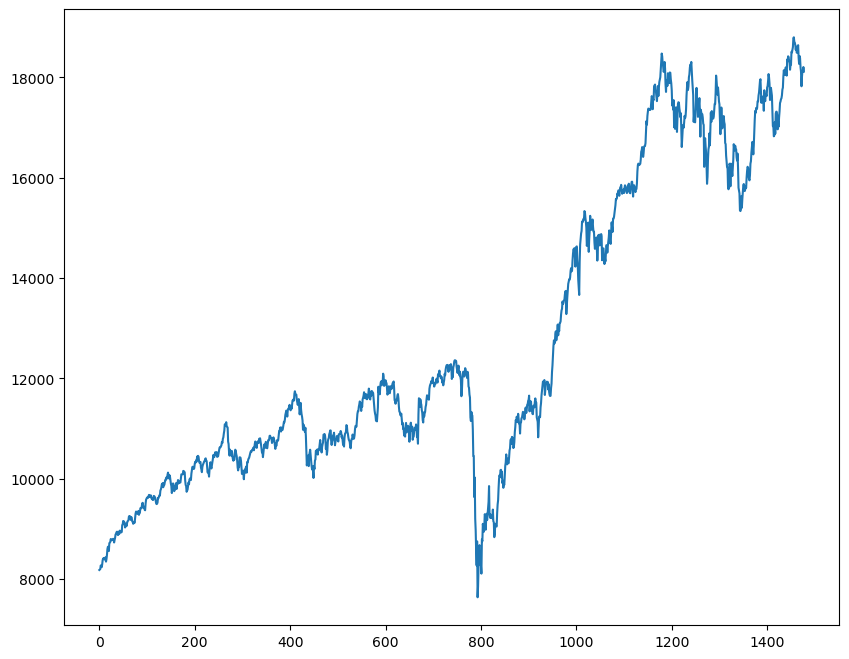

In [8]:
#plot close prices
df['close'].plot(figsize=(10,8))

In [9]:
#x and y variables independent
x=df[['open','low','high']]
y=df['close']

In [10]:
# Add a constant to the independent variables
x = sm.add_constant(x)

In [11]:
#divide into test and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [12]:
print(x_train.shape,x_test.shape)

(1108, 4) (370, 4)


In [13]:
# Define the link function and the probability distribution
family = sm.families.Gaussian()

In [14]:
#get generalized linear regressor, and train on x and y data
genregressor = sm.GLM(y_train, x_train, family=family)
result=genregressor.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  close   No. Observations:                 1108
Model:                            GLM   Df Residuals:                     1104
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          2173.4
Method:                          IRLS   Log-Likelihood:                -5827.2
Date:                Mon, 27 Mar 2023   Deviance:                   2.3995e+06
Time:                        08:32:04   Pearson chi2:                 2.40e+06
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.6278      6.060     -3.239      0.0

In [15]:
#predict value against test
predicted=result.predict(x_test)
print(x_test)

      const      open       low      high
563     1.0  11609.90  11578.80  11657.35
746     1.0  12346.20  12278.75  12355.15
436     1.0  10296.30  10198.40  10398.35
1044    1.0  14575.60  14264.40  14575.60
1244    1.0  17943.70  17648.45  17943.70
...     ...       ...       ...       ...
1099    1.0  15830.10  15752.10  15895.75
1046    1.0  14631.20  14617.60  14876.30
1447    1.0  18385.05  18209.80  18394.60
656     1.0  10989.25  10874.80  11042.60
597     1.0  12027.70  11830.25  12033.25

[370 rows x 4 columns]


In [16]:
predicted.shape

(370,)

In [17]:
#another dataframe to store original and predicted
_df= pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})
print(_df)

      Actual Price  Predicted Price
563       11631.55     11627.484811
746       12340.35     12300.504881
436       10350.15     10310.761381
1044      14348.25     14334.400966
1244      17777.85     17719.946651
...            ...              ...
1099      15765.85     15834.290553
1046      14853.55     14851.586435
1447      18304.55     18264.627675
656       11033.85     10946.307453
597       11849.70     11876.788423

[370 rows x 2 columns]


In [18]:
import math
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))
print('Mean Square Error:',metrics.mean_squared_error(y_test,predicted))
print('Root Mean Square Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 28.059063020296623
Mean Square Error: 1482.4536608929752
Root Mean Square Error: 38.50264485581445


<AxesSubplot:>

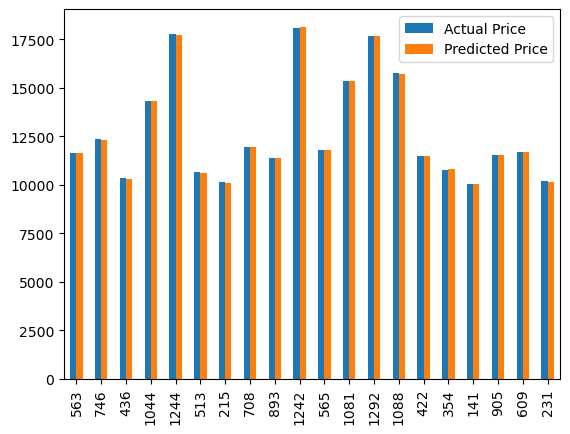

In [19]:
_df.head(20).plot(kind='bar')

In [21]:
#predict value against test
predicted=result.predict(x)
print(predicted)

0        8143.751187
1        8173.529670
2        8193.717279
3        8268.487247
4        8258.514082
            ...     
1473    18028.525792
1474    18062.532658
1475    18155.721495
1476    18173.281713
1477    18128.542302
Length: 1478, dtype: float64


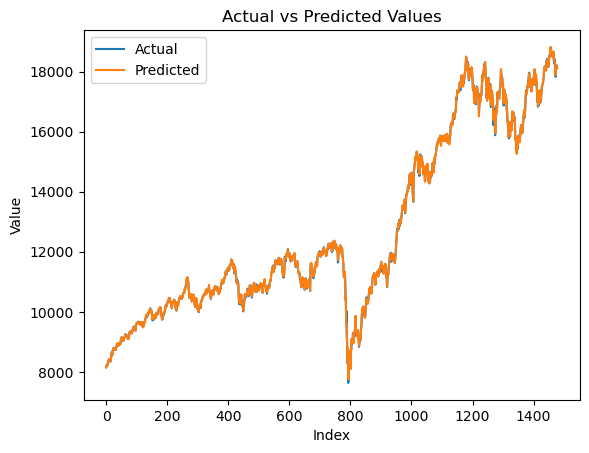

In [22]:
# Plot the actual vs predicted values
plt.plot(y, label='Actual')
plt.plot(predicted, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()